In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ml-100k/u.data',sep='\t', names=['user_id','item_id','rating','ts'])
df.head()

,user_id,item_id,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id    100000 non-null int64
item_id    100000 non-null int64
rating     100000 non-null int64
ts         100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
cols = "item_id|title| release date | video release date |\
              IMDb URL | unknown | Action | Adventure | Animation |\
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |\
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |\
              Thriller | War | Western".split('|')
movies = pd.read_csv('ml-100k/u.item',sep='|',names=cols,engine='python')
movies.head()

,item_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
movies.columns

Index(['item_id', 'title', ' release date ', ' video release date ',
       '              IMDb URL ', ' unknown ', ' Action ', ' Adventure ',
       ' Animation ', '              Children's ', ' Comedy ', ' Crime ',
       ' Documentary ', ' Drama ', ' Fantasy ', '              Film-Noir ',
       ' Horror ', ' Musical ', ' Mystery ', ' Romance ', ' Sci-Fi ',
       '              Thriller ', ' War ', ' Western'],
      dtype='object')

In [9]:
movies[['item_id','title']].head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df.drop('ts',axis=1).head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [11]:
data = pd.merge(df.drop('ts',axis=1),movies[['item_id','title']], on='item_id')
data.head()

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id    100000 non-null int64
item_id    100000 non-null int64
rating     100000 non-null int64
title      100000 non-null object
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [13]:
data.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [14]:
data['title'].nunique()

1664

In [15]:
data['user_id'].nunique()

943

In [16]:
movies = data['title'].unique()
for m in movies:
    print(m, ' '*5,data['rating'][data['title'] == m].mean())

Kolya (1996)       3.9914529914529915
L.A. Confidential (1997)       4.161616161616162
Heavyweights (1994)       2.1538461538461537
Legends of the Fall (1994)       3.45679012345679
Jackie Brown (1997)       3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)       4.252577319587629
Hunt for Red October, The (1990)       3.8634361233480177
Jungle Book, The (1994)       3.5647058823529414
Grease (1978)       3.347058823529412
Remains of the Day, The (1993)       3.94
Men in Black (1997)       3.745874587458746
Romy and Michele's High School Reunion (1997)       3.061224489795918
Star Trek: First Contact (1996)       3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995)       2.8947368421052633
Batman Forever (1995)       2.6666666666666665
Only You (1994)       3.1538461538461537
Age of Innocence, The (1993)       3.3846153846153846
Sabrina (1995)       3.5
Just Cause (1995)       3.142857142857143
Endless Summer 2, The (1994)

Waterworld (1995)       2.803921568627451
Mystery Science Theater 3000: The Movie (1996)       3.4307692307692306
Delicatessen (1991)       3.876923076923077
Schindler's List (1993)       4.466442953020135
Speed (1994)       3.6478260869565218
Pollyanna (1960)       3.1481481481481484
What's Eating Gilbert Grape (1993)       3.5391304347826087
Primal Fear (1996)       3.601123595505618
Brady Bunch Movie, The (1995)       2.8026315789473686
Mad City (1997)       3.25531914893617
Real Genius (1985)       3.6638655462184873
Crow, The (1994)       3.417910447761194
Twelve Monkeys (1995)       3.798469387755102
Tie Me Up! Tie Me Down! (1990)       3.1875
Cape Fear (1991)       3.456140350877193
Angels in the Outfield (1994)       2.923076923076923
U Turn (1997)       3.359375
Apostle, The (1997)       3.6545454545454548
Lawnmower Man, The (1992)       2.4461538461538463
Pulp Fiction (1994)       4.060913705583756
Blade Runner (1982)       4.138181818181818
20,000 Leagues Under the Sea (1954

Great White Hype, The (1996)       2.7551020408163267
Babe (1995)       3.9954337899543377
Quiz Show (1994)       3.645714285714286
Kull the Conqueror (1997)       2.63768115942029
Last Supper, The (1995)       3.4482758620689653
Evening Star, The (1996)       2.9310344827586206
Omen, The (1976)       3.388235294117647
Kundun (1997)       3.6904761904761907
With Honors (1994)       3.0652173913043477
Great Expectations (1998)       3.2222222222222223
Line King: Al Hirschfeld, The (1996)       3.0
Professional, The (1994)       3.704697986577181
Michael Collins (1996)       3.4565217391304346
Grifters, The (1990)       3.4831460674157304
Shiloh (1997)       2.8333333333333335
Independence Day (ID4) (1996)       3.438228438228438
In & Out (1997)       3.3043478260869565
Hudsucker Proxy, The (1994)       3.5545454545454547
Tin Cup (1996)       3.160621761658031
Jane Eyre (1996)       3.4761904761904763
Braveheart (1995)       4.151515151515151
My Fellow Americans (1996)       3.1627906976

Great Dictator, The (1940)       4.021739130434782
Kiss Me, Guido (1997)       3.161290322580645
Night of the Living Dead (1968)       3.421875
Charade (1963)       3.925
Hoodlum (1997)       2.9315068493150687
Bullets Over Broadway (1994)       3.7209302325581395
Sex, Lies, and Videotape (1989)       3.4752475247524752
Georgia (1995)       2.9
Bad Boys (1995)       3.1052631578947367
Benny & Joon (1993)       3.4607843137254903
Ref, The (1994)       3.0344827586206895
Local Hero (1983)       3.9682539682539684
Little Princess, A (1995)       3.658536585365854
I Know What You Did Last Summer (1997)       3.06
Breaking the Waves (1996)       3.72972972972973
Last Dance (1996)       3.111111111111111
Looking for Richard (1996)       3.727272727272727
D3: The Mighty Ducks (1996)       2.5789473684210527
Manhattan (1979)       3.769230769230769
Emma (1996)       3.7175141242937855
American in Paris, An (1951)       3.7
Body Snatchers (1993)       2.971014492753623
Blue Angel, The (Blaue En

Amityville Horror, The (1979)       2.5660377358490565
So I Married an Axe Murderer (1993)       3.0526315789473686
Double vie de Véronique, La (Double Life of Veronique, The) (1991)       3.6818181818181817
Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (1970)       3.9166666666666665
James and the Giant Peach (1996)       3.126984126984127
Manny & Lo (1996)       3.1538461538461537
Client, The (1994)       3.381443298969072
Great Race, The (1965)       3.2903225806451615
Crooklyn (1994)       3.5
Man of the Year (1995)       3.111111111111111
Amos & Andrew (1993)       2.6842105263157894
Convent, The (Convento, O) (1995)       2.5
Mother Night (1996)       3.1818181818181817
Foxfire (1996)       2.933333333333333
Meet Wally Sparks (1997)       2.142857142857143
Cops and Robbersons (1994)       2.3076923076923075
Free Willy 3: The Rescue (1997)       1.7407407407407407
Better Off Dead... (1985)       3.569620253164557
39 Steps, The (1935)       4.0508474576271185
Heavy 

Stealing Beauty (1996)       3.375
Last Action Hero (1993)       2.7457627118644066
Bronx Tale, A (1993)       3.7916666666666665
Thirty-Two Short Films About Glenn Gould (1993)       3.9444444444444446
Manhattan Murder Mystery (1993)       3.6296296296296298
Treasure of the Sierra Madre, The (1948)       4.1
Drop Dead Fred (1991)       2.75
Robert A. Heinlein's The Puppet Masters (1994)       3.0
Home Alone 3 (1997)       1.894736842105263
Boxing Helena (1993)       2.2
Mrs. Parker and the Vicious Circle (1994)       3.272727272727273
Delta of Venus (1994)       3.0
Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)       3.772727272727273
Surviving the Game (1994)       2.4545454545454546
Safe (1995)       4.0
Amateur (1994)       3.1666666666666665
Anne Frank Remembered (1995)       3.857142857142857
Specialist, The (1994)       2.25
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)       2.6
Assignment, The (1997)       3.5
Fatal Insti

Nobody's Fool (1994)       3.608695652173913
Deep Rising (1998)       2.4285714285714284
Metro (1997)       2.9166666666666665
Fair Game (1995)       2.1818181818181817
Mrs. Dalloway (1997)       3.6
I'll Do Anything (1994)       2.6
Pie in the Sky (1995)       2.0
Substance of Fire, The (1996)       3.25
Swan Princess, The (1994)       2.857142857142857
Gone Fishin' (1997)       1.8181818181818181
Flipper (1996)       2.45
Madonna: Truth or Dare (1991)       2.4705882352941178
One Night Stand (1997)       3.466666666666667
Guilty as Sin (1993)       2.1666666666666665
Trial and Error (1997)       2.5217391304347827
Bad Taste (1987)       3.375
Citizen Ruth (1996)       3.6222222222222222
Halloween: The Curse of Michael Myers (1995)       2.2
Albino Alligator (1996)       2.5
Mina Tannenbaum (1994)       3.6666666666666665
Tango Lesson, The (1997)       3.3846153846153846
Margaret's Museum (1995)       4.0
For Richer or Poorer (1997)       2.4285714285714284
Three Wishes (1995)       3

New Jersey Drive (1995)       3.0
Jury Duty (1995)       2.0
U.S. Marshalls (1998)       3.0
Kim (1950)       3.2857142857142856
National Lampoon's Senior Trip (1995)       2.4285714285714284
Picture Bride (1995)       3.1
Bloody Child, The (1996)       1.0
Cement Garden, The (1993)       3.6
Prisoner of the Mountains (Kavkazsky Plennik) (1996)       3.0
Steal Big, Steal Little (1995)       2.5714285714285716
Hurricane Streets (1998)       2.6666666666666665
Yankee Zulu (1994)       1.0
Midnight Dancers (Sibak) (1994)       2.8
Duoluo tianshi (1995)       3.1666666666666665
Eye of Vichy, The (Oeil de Vichy, L') (1993)       1.0
Love in the Afternoon (1957)       3.9
Dangerous Beauty (1998)       3.769230769230769
Golden Earrings (1947)       4.0
Destiny Turns on the Radio (1995)       3.0
Alphaville (1965)       3.3333333333333335
Twisted (1996)       3.5
Run of the Country, The (1995)       3.25
Lashou shentan (1992)       1.0
Switchback (1997)       2.823529411764706
Bewegte Mann, De

Twilight (1998)       2.5
Jupiter's Wife (1994)       4.0
Nothing Personal (1995)       2.0
Temptress Moon (Feng Yue) (1996)       1.6666666666666667
Saint of Fort Washington, The (1993)       5.0
Etz Hadomim Tafus (Under the Domin Tree) (1994)       2.0
It Takes Two (1995)       2.6666666666666665
Paris, France (1993)       2.3333333333333335
Low Life, The (1994)       1.0
Mostro, Il (1994)       1.0
Kika (1993)       2.0
Mirage (1995)       3.0
Bonheur, Le (1965)       2.0
Á köldum klaka (Cold Fever) (1994)       3.0
Sweet Nothing (1995)       3.0
B. Monkey (1998)       3.0
Death in the Garden (Mort en ce jardin, La) (1956)       1.0
Ripe (1996)       2.0
Ed's Next Move (1996)       2.6666666666666665
Two Friends (1986)        3.0
Men of Means (1998)       2.0
Niagara, Niagara (1997)       2.0
Spirits of the Dead (Tre passi nel delirio) (1968)       2.5
Glass Shield, The (1994)       2.0
Slingshot, The (1993)       3.5
Scarlet Letter, The (1926)       3.0
Condition Red (1995)       2

In [17]:
avg_rates =  data.groupby('title')['rating'].mean()
avg_rates.head(20)

title
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
8 1/2 (1963)                                   3.815789
8 Heads in a Duffel Bag (1997)                 3.250000
8 Seconds (1994)                               3.750000
A Chef in Love (1996)                          4.125000
Above the Rim (1994)                           3.000000
Absolute Power (1997)                          3.370079
Abyss, The (1989)                              3.589404
Ace Ventura: Pet Detective (1994)         

In [18]:

avg_rates.sort_values(ascending=False).head(30)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [19]:
rate_count =  data.groupby('title')['rating'].count()
rate_count.head(20)

title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
8 1/2 (1963)                                    38
8 Heads in a Duffel Bag (1997)                   4
8 Seconds (1994)                                 4
A Chef in Love (1996)                            8
Above the Rim (1994)                             5
Absolute Power (1997)                          127
Abyss, The (1989)                              151
Ace Ventura: Pet Detective (1994)              103
Ace Ventura: When Nature Calls (1995)           37
Across the Sea of Time (1

In [20]:
rate_count.sort_values(ascending=False).head(20)

title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: rating, dtype: int64

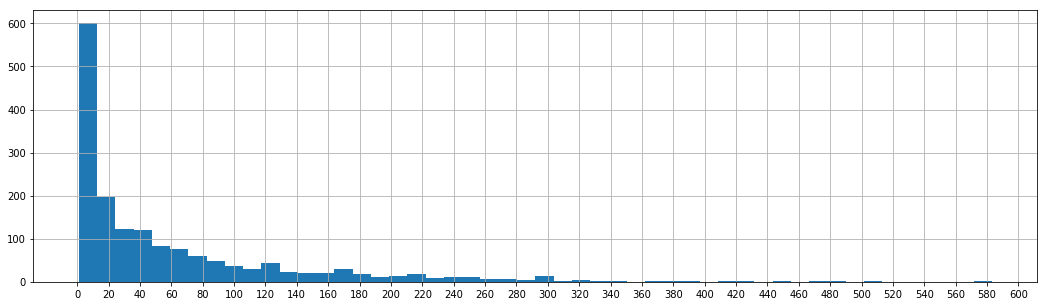

In [21]:
plt.figure(figsize=(18,5))
rate_count.hist(bins=50)
t = plt.xticks(range(0,601,20))

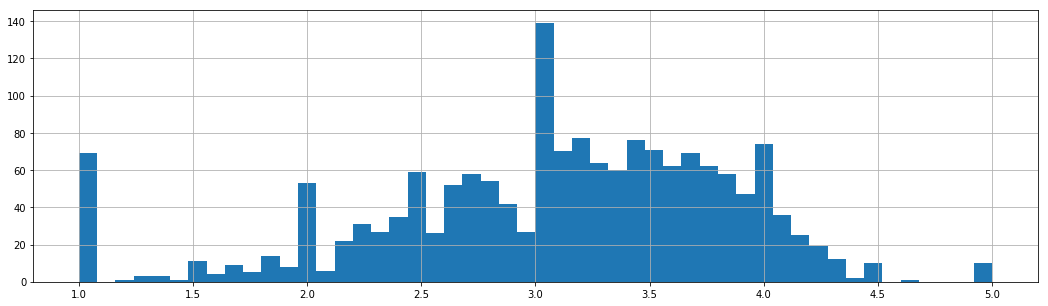

In [22]:
plt.figure(figsize=(18,5))
avg_rates.hist(bins=50)

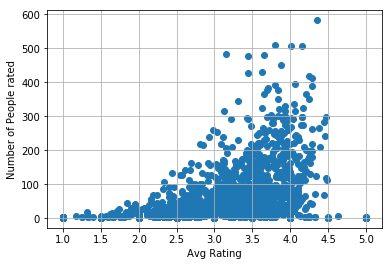

In [23]:
plt.scatter(x=avg_rates, y=rate_count)
plt.xlabel('Avg Rating')
plt.ylabel('Number of People rated')
plt.grid()

In [24]:
df_pivot = data.pivot_table(index='user_id',columns='title',values='rating')
df_pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [25]:
inp = 'Star Wars (1977)'

In [26]:
df_pivot[inp].head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [28]:
sim_inp = df_pivot.corrwith(df_pivot[inp])

In [29]:
sim_inp

title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)        

In [30]:
sim_df = pd.DataFrame(sim_inp,columns=['Correlation'])
sim_df.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [31]:
sim_df.sort_values(by='Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [32]:
sim_df['count'] = rate_count

In [33]:
sim_df['avg_rate'] = avg_rates

In [34]:
sim_df.head()

,Correlation,count,avg_rate
title,,,
'Til There Was You (1997),0.872872,9,2.333333
1-900 (1994),-0.645497,5,2.600000
101 Dalmatians (1996),0.211132,109,2.908257
12 Angry Men (1957),0.184289,125,4.344000
187 (1997),0.027398,41,3.024390


In [35]:
sim_df[(sim_df['count']>100)].sort_values('Correlation',ascending=False).head(10)

,Correlation,count,avg_rate
title,,,
Star Wars (1977),1.000000,583,4.358491
"Empire Strikes Back, The (1980)",0.747981,367,4.204360
Return of the Jedi (1983),0.672556,507,4.007890
Raiders of the Lost Ark (1981),0.536117,420,4.252381
Austin Powers: International Man of Mystery (1997),0.377433,130,3.246154
"Sting, The (1973)",0.367538,241,4.058091
Indiana Jones and the Last Crusade (1989),0.350107,331,3.930514
Pinocchio (1940),0.347868,101,3.673267
"Frighteners, The (1996)",0.332729,115,3.234783


In [36]:
recom = sim_df[(sim_df['count']>100)].sort_values('Correlation',ascending=False)
recom.drop(inp,axis=0, inplace=True)
recommended = recom.index[:3]
for r in recommended:
    print(r)

Empire Strikes Back, The (1980)
Return of the Jedi (1983)
Raiders of the Lost Ark (1981)


In [37]:
recom.head(3)

,Correlation,count,avg_rate
title,,,
"Empire Strikes Back, The (1980)",0.747981,367,4.204360
Return of the Jedi (1983),0.672556,507,4.007890
Raiders of the Lost Ark (1981),0.536117,420,4.252381
